# Explore here

In [1]:
import pandas as pd

In [2]:
# Apertura de datasets

appearence = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/appearances.csv")
club_games = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/club_games.csv")
clubs = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/clubs.csv")
competitions = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/competitions.csv")
game_events = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/game_events.csv")
game_lineups = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/game_lineups.csv")
transfers = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/transfers.csv")
players = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/players.csv")
games = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/games.csv")
player_valuations = pd.read_csv("/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/player_valuations.csv")

#  Datasets en un diccionario para organizarlos
datasets = {"Appearence": appearence, "Club Games": club_games, "Clubs": clubs, "Competitions": competitions,
            "Game events":game_events, "Game Lineups":game_lineups, "Transfers":transfers, "Players":players,
            "Games":games, "Player Valuations":player_valuations}

ds_players_info= {"Appearence": appearence, "Players":players, "Player Valuations":player_valuations}

for name, dataset in ds_players_info.items():
    print(f"El shape de {name}: {dataset.shape}")


El shape de Appearence: (697243, 13)
El shape de Players: (32480, 23)
El shape de Player Valuations: (494561, 5)


In [3]:
for name, dataset in ds_players_info.items():
    print(f"Las columnas de {name}: {dataset.columns}")

Las columnas de Appearence: Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')
Las columnas de Players: Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')
Las columnas de Player Valuations: Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')


### Dataset filtrados por columnas relevantes:

In [4]:
appearence_filtered=appearence.drop(["appearance_id", "player_current_club_id"], axis = 1)
player_valuations_filtered=player_valuations.drop(["current_club_id", "player_club_domestic_competition_id"], axis = 1)
players_filtered=players.drop(["first_name", "last_name", "last_season", "current_club_id", "player_code", "contract_expiration_date","agent_name","image_url","url", "current_club_domestic_competition_id","current_club_name","market_value_in_eur", "highest_market_value_in_eur"], axis = 1)

Acá esta hecho el group by por jugador y por año:

In [5]:
# 1. Convertir la columna 'date' al formato datetime (si no lo está ya)
appearence_filtered['date'] = pd.to_datetime(appearence_filtered['date'])

# 2. Crear una nueva columna que contenga el año del partido
appearence_filtered['year'] = appearence_filtered['date'].dt.year

# 3. Agrupar por 'player_id' y 'year', y calcular agregados para cada columna relevante
gb_app = appearence_filtered.groupby(['player_id', 'year', "competition_id", "player_club_id","player_name"]).agg({
    'game_id': 'count',               # Número de partidos jugados
    'yellow_cards': 'mean',            # Total de tarjetas amarillas
    'red_cards': 'mean',               # Total de tarjetas rojas
    'goals': 'mean',                   # Total de goles
    'assists': 'mean',                 # Total de asistencias
    'minutes_played': 'mean'           # Total de minutos jugados
}).reset_index()

# 4. Renombrar la columna 'game_id' a algo más significativo (opcional)
gb_app = gb_app.rename(columns={'game_id': 'matches_played'})

# 5. Ver el resultado
print(gb_app)

       player_id  year competition_id  player_club_id      player_name  \
0             10  2012             EL             398   Miroslav Klose   
1             10  2012            ELQ             398   Miroslav Klose   
2             10  2012            IT1             398   Miroslav Klose   
3             10  2013            CIT             398   Miroslav Klose   
4             10  2013             EL             398   Miroslav Klose   
...          ...   ...            ...             ...              ...   
89516     550027  2017           UKRP            6993     Eriks Santos   
89517     550323  2017           UKRP           23611    Nazar Yedynak   
89518     552445  2015           POCP            2425      Bruno Sousa   
89519     573775  2017            CDR            3709        Hugo Duro   
89520     581749  2017           UKRP           49634  Viktor Barabash   

       matches_played  yellow_cards  red_cards     goals   assists  \
0                   2      0.000000      

Groupby Player_valuation

In [6]:
# 1. Convertir la columna 'date' al formato datetime (si no lo está ya)
player_valuations_filtered['date'] = pd.to_datetime(player_valuations_filtered['date'])

# 2. Crear una nueva columna que contenga el año del partido
player_valuations_filtered['year'] = player_valuations_filtered['date'].dt.year

# 3. Agrupar por 'player_id' y 'year', y calcular agregados para cada columna relevante
gb_player_val = player_valuations_filtered.groupby(['player_id', 'year']).agg({
    "market_value_in_eur":"mean"
}).reset_index()

# 4. Ver el resultado
print(gb_player_val)

        player_id  year  market_value_in_eur
0              10  2004            7000000.0
1              10  2005           12000000.0
2              10  2006           25000000.0
3              10  2007           23000000.0
4              10  2008           20000000.0
...           ...   ...                  ...
249886    1294052  2024             150000.0
249887    1296876  2024             500000.0
249888    1302421  2024             100000.0
249889    1306131  2024             100000.0
249890    1306851  2024              50000.0

[249891 rows x 3 columns]


Hacemos el merge (hay algunas valuaciones que se pierden)

In [7]:
# Hacemos el merge:
app_plval_merged = pd.merge(gb_app, gb_player_val, on=['player_id', 'year'], how='left')
print(app_plval_merged.shape)
app_plval_merged

(89521, 12)


,player_id,year,competition_id,player_club_id,player_name,matches_played,yellow_cards,red_cards,goals,assists,minutes_played,market_value_in_eur
0,10,2012,EL,398,Miroslav Klose,2,0.000000,0.0,0.000000,0.000000,52.000000,6000000.0
1,10,2012,ELQ,398,Miroslav Klose,1,1.000000,0.0,1.000000,0.000000,83.000000,6000000.0
2,10,2012,IT1,398,Miroslav Klose,17,0.294118,0.0,0.588235,0.058824,76.235294,6000000.0
3,10,2013,CIT,398,Miroslav Klose,2,0.500000,0.0,0.000000,0.000000,80.000000,3000000.0
4,10,2013,EL,398,Miroslav Klose,3,0.333333,0.0,0.000000,0.000000,22.333333,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89516,550027,2017,UKRP,6993,Eriks Santos,1,0.000000,0.0,0.000000,0.000000,59.000000,NaN
89517,550323,2017,UKRP,23611,Nazar Yedynak,1,0.000000,0.0,0.000000,0.000000,120.000000,NaN
89518,552445,2015,POCP,2425,Bruno Sousa,2,0.000000,0.0,0.000000,0.000000,34.500000,NaN
89519,573775,2017,CDR,3709,Hugo Duro,1,0.000000,0.0,0.000000,0.000000,25.000000,NaN


Otros tipos de merge:

In [8]:
# Hacemos el merge:
app_plval_merged2 = pd.merge(gb_app, gb_player_val, on=['player_id', 'year'], how='right')
print(app_plval_merged2.shape)

app_plval_merged3 = pd.merge(gb_app, gb_player_val, on=['player_id', 'year'], how='inner')
print(app_plval_merged3.shape)

app_plval_merged4 = pd.merge(gb_app, gb_player_val, on=['player_id', 'year'], how='outer')
print(app_plval_merged4.shape)

(293951, 12)
(85844, 12)
(297628, 12)


Aquí el merge con la información de los jugadores (posible df final)

In [10]:
df = pd.merge(app_plval_merged, players_filtered, on=['player_id'], how='left')
print(df.shape)
df

(89521, 21)


,player_id,year,competition_id,player_club_id,player_name,matches_played,yellow_cards,red_cards,goals,assists,...,market_value_in_eur,name,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm
0,10,2012,EL,398,Miroslav Klose,2,0.000000,0.0,0.000000,0.000000,...,6000000.0,Miroslav Klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0
1,10,2012,ELQ,398,Miroslav Klose,1,1.000000,0.0,1.000000,0.000000,...,6000000.0,Miroslav Klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0
2,10,2012,IT1,398,Miroslav Klose,17,0.294118,0.0,0.588235,0.058824,...,6000000.0,Miroslav Klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0
3,10,2013,CIT,398,Miroslav Klose,2,0.500000,0.0,0.000000,0.000000,...,3000000.0,Miroslav Klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0
4,10,2013,EL,398,Miroslav Klose,3,0.333333,0.0,0.000000,0.000000,...,3000000.0,Miroslav Klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89516,550027,2017,UKRP,6993,Eriks Santos,1,0.000000,0.0,0.000000,0.000000,...,NaN,Eriks Santos,Brazil,"Pedreiras, Maranhão",Brazil,1996-02-23 00:00:00,Centre-Back,Defender,left,182.0
89517,550323,2017,UKRP,23611,Nazar Yedynak,1,0.000000,0.0,0.000000,0.000000,...,NaN,Nazar Yedynak,Ukraine,Lviv,Ukraine,1998-04-03 00:00:00,Centre-Back,Defender,NaN,192.0
89518,552445,2015,POCP,2425,Bruno Sousa,2,0.000000,0.0,0.000000,0.000000,...,NaN,Bruno Sousa,Portugal,Porto,Portugal,1996-03-12 00:00:00,Attacking Midfield,Midfield,right,177.0
89519,573775,2017,CDR,3709,Hugo Duro,1,0.000000,0.0,0.000000,0.000000,...,NaN,Hugo Duro,Spain,Getafe,Spain,1999-11-10 00:00:00,Centre-Forward,Attack,left,177.0


In [5]:
for name, df in datasets.items():
    duplicados = df.duplicated()
    num_duplicados = duplicados.sum()
    print(f"La cantidad de duplicados en {name}: {num_duplicados}")


La cantidad de duplicados en Appearence: 0
La cantidad de duplicados en Club Games: 0
La cantidad de duplicados en Clubs: 0
La cantidad de duplicados en Competitions: 0
La cantidad de duplicados en Game events: 0
La cantidad de duplicados en Game Lineups: 0
La cantidad de duplicados en Transfers: 0
La cantidad de duplicados en Players: 0
La cantidad de duplicados en Games: 0
La cantidad de duplicados en Player Valuations: 0


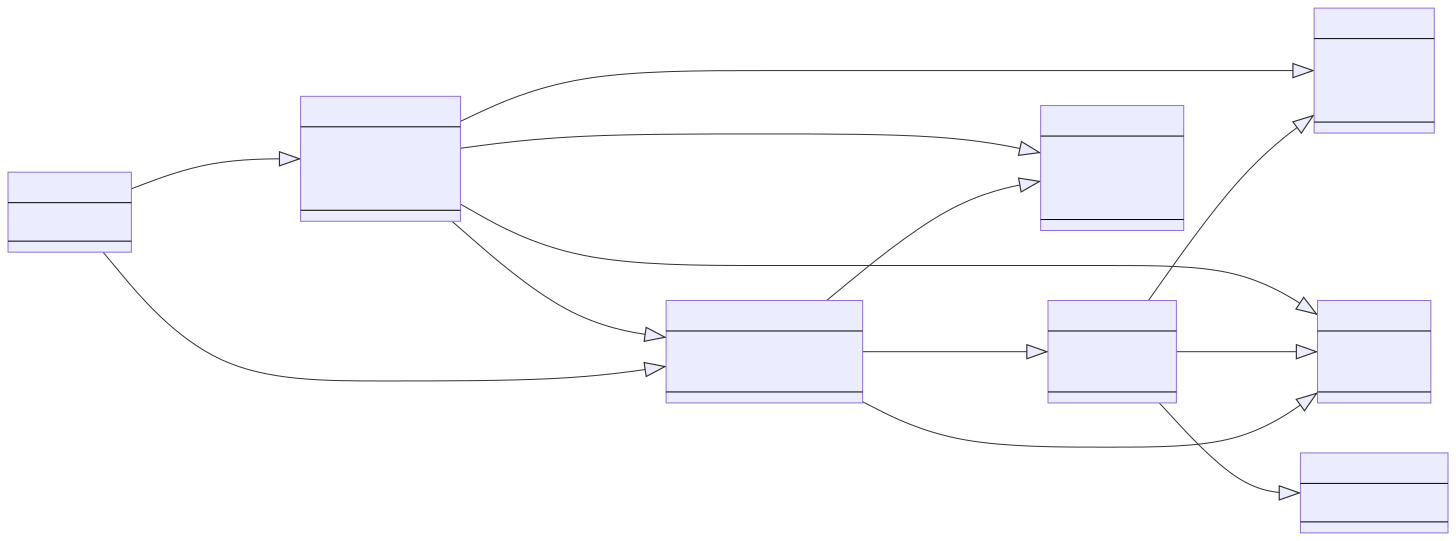

In [6]:
from IPython.display import SVG, display

display(SVG(filename="/workspaces/proyecto_final_transfer/data/datos_de_transfer/proyecto final/diagram.svg"))

In [55]:
messi=appearence[appearence['player_id'] == 28003]
messi

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
8135,2244378_28003,2244378,28003,131,583,2012-08-19,Lionel Messi,ES1,0,0,2,0.0,90.0
8929,2244388_28003,2244388,28003,131,583,2012-08-22,Lionel Messi,SUC,0,0,1,0.0,90.0
11912,2242828_28003,2242828,28003,131,583,2012-08-26,Lionel Messi,ES1,0,0,2,0.0,90.0
12883,2244389_28003,2244389,28003,131,583,2012-08-29,Lionel Messi,SUC,0,0,1,0.0,90.0
15970,2242881_28003,2242881,28003,131,583,2012-09-02,Lionel Messi,ES1,0,0,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685288,2899620_28003,2899620,28003,131,583,2017-10-01,Lionel Messi,ES1,0,0,2,1.0,90.0
686845,2899617_28003,2899617,28003,131,583,2017-10-14,Lionel Messi,ES1,0,0,0,0.0,90.0
689143,2917396_28003,2917396,28003,131,583,2017-10-18,Lionel Messi,CL,0,0,1,1.0,90.0
690644,2899630_28003,2899630,28003,131,583,2017-10-21,Lionel Messi,ES1,0,0,0,1.0,90.0


In [38]:
messi_player=players[players['player_id'] == 28003]
messi_player

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
2347,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,left,170.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lionel-messi/p...,FR1,Paris Saint-Germain Football Club,35000000.0,180000000.0


In [13]:
messi_pl_val=player_valuations[player_valuations['player_id'] == 28003]
messi_pl_val

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
2248,28003,2004-12-20,3000000,583,FR1
4728,28003,2005-12-28,5000000,583,FR1
4959,28003,2006-01-20,15000000,583,FR1
9674,28003,2007-07-26,40000000,583,FR1
11042,28003,2007-09-12,60000000,583,FR1
14290,28003,2008-02-04,55000000,583,FR1
17826,28003,2008-07-10,55000000,583,FR1
23698,28003,2009-01-26,55000000,583,FR1
25586,28003,2009-04-28,60000000,583,FR1
28672,28003,2009-07-22,70000000,583,FR1
